Project: House-Prices-EDA  
Author: Olaf Steenbeck  
Timeframe: 09/15/2020 11:00h - 09/17/2020 11:00h

# Step (Business Understanding): 

## Business Understanding / the Plan

**First steps**
- Daten ansehen und verstehen, was da drin steht
- Auffäligkeiten notieren
- Was sollte angepasst werden, damit ein besseres Gefühl für die Werte entstehen kann?

- Come to an understanding for the Data and Business Case
- Make some notes about what stands out
- Are there any problems to solve? Write down.

**Get in touch with the data**
- Amounnt of rows and columns
- Cleaning the column-names
- Overview with .shape .dtypes .info() .describe() .nunique()
- Can we find usable objekt data?
- Check missings values

## Business Case
**Die Ausgangslage**
- Ich möchte mir für meine Freundin und mich ein Haus in der uns unbekannten Region King County kaufen.
- Es geht uns primäer um ein möglichst gutes Preis-Leistungs-Verhältnis.
- Das heisst, wir suchen einen günstigen Quadratmeterpreis (Wohnfläche, Gründstück)  
  bei möglichst guter Qualität (Zustand, Note).
- Wir arbeiten beide im Home-Office, deshalb ist der genaue Standort (PLZ) nicht so entscheidend.
- Wir haben keine Kinder und brauchen ca. 120qm (Wohnfläche).
- 4 Zimmer (Wohnen, Schlafen, Gäste, Home Office) sollen es sein.
- Das Grundstück sollte nicht zu groß sein (<1000qm). Wir mögen das Rasenmähen nicht.
- Unser Budget beträgt 500.000 USD
- Wir haben es nicht eilig. Zeitpunkt des Kaufes ist nicht entscheidend.
- Einen Keller brauchen wir nicht. Wenn er aber günstig zu haben ist, wäre es schön.


**Sich daraus ergebende Fragen**  
1. Welche Regionen (Top10-PLZ) sollte ich wählen? qm-Preis (Wohnraum) soll günstig sein.
2. Gibt es einen Kauf-Zeitpunkt im Jahr, der sich anbietet?
3. Lohnt es sich vielleicht doch einen Keller zu nehmen? Was kostet das mehr?
4. Wie gut ist die Versorgungslage (Supermärkte) in den Top10-Regionen?

# Step (Data Mining):

## Importing Python Libraries

In [1]:
reset -fs

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

## Loading data

In [3]:
pwd

'/Users/Olaf/Dropbox/nf-sep-20/nf-Notebooks/project_one'

In [4]:
# path ='/Users/Olaf/Dropbox/nf-sep-20/nf-Notebooks/project_one/data/King_County_House_prices_dataset.csv'
path ='data/King_County_House_prices_dataset.csv'
hp = pd.read_csv(path, delimiter=',')

## Column Names and descriptions
* **id** - unique identified for a house
* **date** - Date house was sold
* **price** - Price is prediction target
* **bedrooms** - Number of Bedrooms/House
* **bathrooms** - Number of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floors** - Total floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


## Get in touch with the data

In [5]:
hp.shape

(21597, 21)

In [6]:
hp.columns = [elem.replace(" ", "_").replace("#", "num").lower() for elem in hp.columns.tolist()]
hp.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
hp.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [8]:
hp.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [9]:
hp.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [164]:
hp.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1000102.00,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,78000.00,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.370000e+00,9.000000e-01,1.00,3.000000e+00,3.000000e+00,4.000000e+00,1.100000e+01
bathrooms,21597.0,2.120000e+00,7.700000e-01,0.50,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080320e+03,9.181100e+02,370.00,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,520.00,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.490000e+00,5.400000e-01,1.00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,19221.0,1.000000e-02,9.000000e-02,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21534.0,2.300000e-01,7.700000e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.410000e+00,6.500000e-01,1.00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [11]:
hp.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

In [12]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


We see: object(2). Not usable for our EDA! In `date` and in `sqft_basement`. Let's have a look:

In [13]:
hp[['date','sqft_basement']].sample(10)

,date,sqft_basement
4004,10/1/2014,450.0
8127,2/12/2015,0.0
2492,2/26/2015,530.0
3340,10/28/2014,100.0
20870,8/5/2014,0.0
2304,2/25/2015,0.0
16778,8/5/2014,0.0
16693,12/20/2014,680.0
15539,7/1/2014,580.0
17491,11/7/2014,0.0


In [14]:
hp.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [15]:
missing = pd.DataFrame(hp.isnull().sum(),columns=['Number'])
missing['Percentage'] = round(missing.Number/hp.shape[0]*100,1)
missing[missing.Number!=0]

,Number,Percentage
waterfront,2376,11.0
view,63,0.3
yr_renovated,3842,17.8


Of the 21 variables 3 have missing values. 
- **waterfront** has no values for 11.0 percent of instances
- **view** has no values for 0.3 percent of instances
- **yr_renovated** has no values for 17.8 percent of instances

## Initial findings
**Aus der Sichtung der Daten geht hervor:**  
- Die Daten enthalten eine Liste von verkauften Wohnimmobilien mit brauchbaren und unbrauchbaren Informationen
- Alle dokumentierten Verkaufsvorgänge stammen aus der Zeit Anfang Mai 2014 bis Ende Mai 2015 (sind also nicht aktuell)
**Größe Bandbreite**
- Gesamtwohnfläche (370 - 13540 sqft)
- Grundstück (520 - 165135 sqft)
- Anzahl Wohnräume (1 - 11 + Outlier 33)
- Zustand (1 - 5)
- Beurteilung (3 - 13)
- Baujahr (1900 - 2015)
- Verkaufspreis (78000 - 7.7 Mio USD)
- qm-Preis (942 - 16325 USD) - wird später erstellt

## Research and Investigation of the Case and the given data
**Background information**
- Google: What's going on in KingCountry. Where it is?
- What is important to know?
- Price developments over the last few years. The data is from 2014.

**Was bedeuten die Spalten?**
- `bedrooms`- die Anzahl der Wohnräume (Quelle verlinken). Hier immer ganze Zahlen.
- `bathrooms` - Verhältnis von Badezimmern zu Wohnräumen! Neue Spalte bauen!
- `sqft_living` - Gesamtwohnfläche (mit Keller)
- `sqft_lot` - Grundstücksfläche
- `condition` - 5 ist gut (Quelle)
- `grade` - 13 ist gut (Quelle)
- `zipcode` - Wie ist das vor Ort organisiert?
- `lat` und `long` - Wo ist das Gebiet genau?
- `sqft_living15` - Durchschnittliche Gesamtwohnfläche (mit Keller) der nächsten 15 Nachbarn
- `sqft_lot15` - Durchschnittliche Grundstücksfläche der nächsten 15 Nachbarn




# Step (Data Cleaning):
- Check for Null-values
- Improve the data

- Check for dependent variables
- First visualizations
- Check Outliers

## Checking for Null-Values

              Count  Percentage
waterfront     2376        11.0
view             63         0.3
yr_renovated   3842        17.8


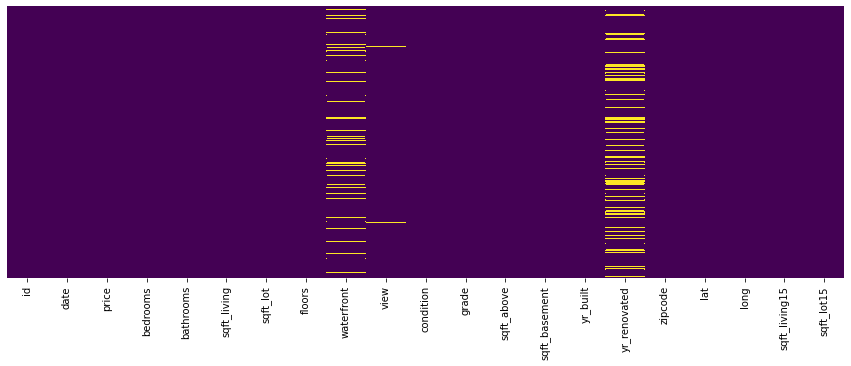

In [16]:
# check for na_values
nan = pd.DataFrame(hp.isnull().sum(),columns=['Count'])
nan['Percentage'] = round(nan.Count/hp.shape[0]*100,1)
print(nan[nan.Count!=0])

# show heatmap of all null values in the dataset
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.heatmap(hp.isnull(), yticklabels=False, cbar=False, cmap='viridis');

## Improve the data (with Feature Engineering)

### date

`date` is a string and should be converted/splittet to:
- `sale_date_value`
- `sale_year`
- `sale_month`
- `sale_day`

Let's do so:

In [17]:
hp['sale_date_value'] = [datetime.date(int(i.split('/')[2]), # year
                                       int(i.split('/')[0]), # month
                                       int(i.split('/')[1])  # days
                                      ) - datetime.date(1900, 1, 1) for i in hp.date]
hp['sale_date_value'] = hp['sale_date_value'].dt.days.astype('int64')

hp['sale_year'] = [int(i.split('/')[2]) for i in hp.date]
hp['sale_month'] = [int(i.split('/')[0]) for i in hp.date]
hp['sale_day'] = [int(i.split('/')[1]) for i in hp.date]

In [18]:
hp[['date', 'sale_date_value','sale_year', 'sale_month', 'sale_day']].sample(5)

,date,sale_date_value,sale_year,sale_month,sale_day
12377,1/12/2015,42014,2015,1,12
12943,2/26/2015,42059,2015,2,26
2489,6/12/2014,41800,2014,6,12
1834,8/20/2014,41869,2014,8,20
7572,5/15/2014,41772,2014,5,15


In [19]:
hp[['date', 'sale_date_value', 'sale_year', 'sale_month', 'sale_day']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 5 columns):
date               21597 non-null object
sale_date_value    21597 non-null int64
sale_year          21597 non-null int64
sale_month         21597 non-null int64
sale_day           21597 non-null int64
dtypes: int64(4), object(1)
memory usage: 843.7+ KB


That looks good. We could drop `date`, but let's keep it for now.  
This is what we have produced:

In [20]:
hp[['date', 'sale_date_value','sale_year', 'sale_month', 'sale_day']].sample(5)

,date,sale_date_value,sale_year,sale_month,sale_day
8714,9/8/2014,41888,2014,9,8
19560,9/2/2014,41882,2014,9,2
14309,11/3/2014,41944,2014,11,3
457,11/26/2014,41967,2014,11,26
11184,12/2/2014,41973,2014,12,2


### sqft_basement

`sqft_basement` seems to hold unexpected values:

In [21]:
hp.sqft_basement.describe()

count     21597
unique      304
top         0.0
freq      12826
Name: sqft_basement, dtype: object

In [22]:
hp.groupby('sqft_basement').count().id.head()

sqft_basement
0.0       12826
10.0          2
100.0        42
1000.0      148
1008.0        1
Name: id, dtype: int64

In [23]:
hp.groupby('sqft_basement').count().id.tail()

sqft_basement
960.0     65
970.0     44
980.0     57
990.0     52
?        454
Name: id, dtype: int64

Oh! We see '?' 454 times. That's a show stopper here.  
**Assumption:** `sqft_basement` ist the result of `sqft_living` - `sqft_above`.  
If this is true, we can calculate all values for `sqft_basement`
Let's check that:

In [24]:
hp['sqft_basement_calc'] =  hp['sqft_living'] - hp['sqft_above']

In [25]:
hp[['sqft_living', 'sqft_above','sqft_basement', 'sqft_basement_calc']].sample(5)

,sqft_living,sqft_above,sqft_basement,sqft_basement_calc
11165,1020,1020,0.0,0
14743,1250,1250,0.0,0
17441,2110,1630,480.0,480
20980,5520,3570,1950.0,1950
12294,1510,1090,420.0,420


In [26]:
# Create int-column from sqft_basement:
hp['sqft_basement_int'] = [int(float(i)) if i !='?' else 0 for i in hp.sqft_basement]

In [27]:
# Check if my assumption is true (21597 - 454 = 21143 rows should appear):
hp.query('sqft_basement_int == sqft_basement_calc and not sqft_basement =="?"'
        )[['sqft_basement', 'sqft_basement_int', 'sqft_basement_calc']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 3 columns):
sqft_basement         21143 non-null object
sqft_basement_int     21143 non-null int64
sqft_basement_calc    21143 non-null int64
dtypes: int64(2), object(1)
memory usage: 660.7+ KB


Ok, that's great. Let's drop the not needed columns `sqft_basement` and `sqft_basement_int`:

In [28]:
hp.drop(columns=['sqft_basement', 'sqft_basement_int'], inplace=False) # change this later to True
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 27 columns):
id                    21597 non-null int64
date                  21597 non-null object
price                 21597 non-null float64
bedrooms              21597 non-null int64
bathrooms             21597 non-null float64
sqft_living           21597 non-null int64
sqft_lot              21597 non-null int64
floors                21597 non-null float64
waterfront            19221 non-null float64
view                  21534 non-null float64
condition             21597 non-null int64
grade                 21597 non-null int64
sqft_above            21597 non-null int64
sqft_basement         21597 non-null object
yr_built              21597 non-null int64
yr_renovated          17755 non-null float64
zipcode               21597 non-null int64
lat                   21597 non-null float64
long                  21597 non-null float64
sqft_living15         21597 non-null int64
sqft_lot15   

In [29]:
# Creating a new Column has_basement

In [30]:
hp['has_basement'] = [True if i > 0 else False for i in hp.sqft_basement_calc]

### waterfront
- `waterfront` with 21597 - 19221 = 2376 null-values
- Ansehen und gucken, ob wir die sinnvoll füllen können.
- Ansonsten droppen.

`waterfront` with 21597 - 19221 = 2376 null-values  

In [183]:
# We fillup the missing value with 0 assuming that a missing value stands for no waterfront
hp.waterfront.fillna(0,inplace=True)

### view

`view` with 21597 - 21534 = 63 null-values

In [182]:
# We fillup the missing value with 0 assuming that a missing value stands for no views
hp.view.fillna(0,inplace=True)

### yr_renovated

`yr_renovated` with 21597 - 17755 = 3842 null-values

In [171]:
hp['yr_renovated'].value_counts().head(10)

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
Name: yr_renovated, dtype: int64

### bedrooms
- Wir haben gesehen, dass es ein Haus mit 33 Wohnräumen gibt.
- Wir sehen uns das mal an:

In [92]:
# Be aware: relevant_cols will get an update later
relevant_cols = ['price', 'yr_built', 'yr_renovated', 'zipcode', 'grade','condition', 'bedrooms', 'bathrooms', 'sqft_above', 'sqft_basement_calc', 'has_basement', 'sqft_lot', 'floors', 'waterfront','sale_year', 'sale_month']

hp.query('bedrooms == 33')[relevant_cols]

,price,yr_built,yr_renovated,zipcode,grade,condition,bedrooms,bathrooms,sqft_above,sqft_basement_calc,has_basement,sqft_lot,floors,waterfront,sale_year,sale_month


- Das ist nicht plausibel. 96 qm_above und 33 Zimmer passen nicht zusammen. Typo! Wir ändern auf 3

In [40]:
hp.loc[hp.bedrooms==33,'bedrooms'] = 3 # Besser: Den Median nehmen

In [51]:
hp.iloc[15856]['bedrooms']

3

### bathrooms
- Das ist merkwürdig. Es wird in 0.25er Schritten bewertet
- Als Verhältnis zu Bedroom kommt es nicht in Frage. Unplausibel. Nochmal recherchieren.

In [167]:
hp['bathrooms'].round(2).value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

### floors

In [169]:
hp['floors'].round(2).value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

### grade

In [173]:
hp['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

### condition

In [174]:
hp['condition'].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

## Conversion of the units into known sizes
**I convert/complete this here, because I can better evaluate plausibility with known units**

- `price` seems to be in USD. We leave it like this.
- `sqft_living` gets an equivalent `qm_living`
- `sqft_lot` gets an equivalent `qm_lot`
- `sqft_above` gets an equivalent `qm_above`
- `sqft_basement` gets an equivalent `qm_basement`
- `sqft_living15` gets an equivalent `qm_living15`
- `sqft_lot15` gets an equivalent `qm_lot15`


In [53]:
hp['qm_living'] = [round(i*0.092903,2) for i in hp.sqft_living]
hp['qm_lot'] = [round(i*0.092903,2) for i in hp.sqft_lot]
hp['qm_above'] = [round(i*0.092903,2) for i in hp.sqft_above]
hp['qm_basement'] = [round(i*0.092903,2) for i in hp.sqft_basement_calc]
hp['qm_living15'] = [round(i*0.092903,2) for i in hp.sqft_living15]
hp['qm_lot15'] = [round(i*0.092903,2) for i in hp.sqft_lot15]

In [54]:
hp[['sqft_living', 
    'sqft_lot', 
    'sqft_above', 
    'sqft_basement', 
    'sqft_living15', 
    'sqft_lot15', 
    'qm_living', 
    'qm_lot', 
    'qm_above', 
    'qm_basement', 
    'qm_living15', 
    'qm_lot15'
   ]].head()

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,qm_living,qm_lot,qm_above,qm_basement,qm_living15,qm_lot15
0,1180,5650,1180,0.0,1340,5650,109.63,524.90,109.63,0.00,124.49,524.90
1,2570,7242,2170,400.0,1690,7639,238.76,672.80,201.60,37.16,157.01,709.69
2,770,10000,770,0.0,2720,8062,71.54,929.03,71.54,0.00,252.70,748.98
3,1960,5000,1050,910.0,1360,5000,182.09,464.51,97.55,84.54,126.35,464.51
4,1680,8080,1680,0.0,1800,7503,156.08,750.66,156.08,0.00,167.23,697.05


In [55]:
hp.qm_living.dtype

dtype('float64')

### price
- Ein wichtiger Indikator für unseren Business-Case ist der qm_price (in USD pro qm_above)
- den bauen wir uns jetzt

In [56]:
hp['qm_price'] = hp['price'] / hp['qm_above']
hp['qm_price'] = hp['qm_price'].round(2)

In [57]:
hp.qm_price.head()

0    2024.08
1    2668.65
2    2516.07
3    6191.70
4    3267.56
Name: qm_price, dtype: float64

## The Dummy Variable Trap

We've learned, that we should avoid to bring dependend columns in our model.  
As we have found out that `sqft_living`, `sqft_above` and `sqft_basement_calc` are dependend, we have to drop one.  
Let's drop `sqft_living`

In [58]:
hp.drop(columns=['sqft_living'], inplace=False).info() # we can set it to True later

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 34 columns):
id                    21597 non-null int64
date                  21597 non-null object
price                 21597 non-null float64
bedrooms              21597 non-null int64
bathrooms             21597 non-null float64
sqft_lot              21597 non-null int64
floors                21597 non-null float64
waterfront            19221 non-null float64
view                  21534 non-null float64
condition             21597 non-null int64
grade                 21597 non-null int64
sqft_above            21597 non-null int64
sqft_basement         21597 non-null object
yr_built              21597 non-null int64
yr_renovated          17755 non-null float64
zipcode               21597 non-null int64
lat                   21597 non-null float64
long                  21597 non-null float64
sqft_living15         21597 non-null int64
sqft_lot15            21597 non-null int64
sale_date_val

# Step (Data Exploration):

**Zuerst ein paar Übersichten**
1. Correlation analysis
2. Pairplots
3. Verteilung der Daten (Histogramme)
4. Beantwortung der Fragen aus dem Business-Case

## Separate categorical and continuous variables
- Nach der Sichtung der Daten und komme ich zu folgender Einschätzung

In [93]:
# For several queries, just to have a set of meaningful columns:
relevant_cols = ['price', 'qm_price', 'yr_built', 'yr_renovated', 'zipcode', 'grade','condition', 
                 'bedrooms', 'bathrooms', 'qm_above', 'qm_basement', 'has_basement', 'qm_lot', 
                 'floors', 'waterfront', 'sale_year', 'sale_month']


# Valuable continuous variables are:
continuous_var = ['bedrooms', 
                  'bathrooms', 
                  'qm_living', 
                  'qm_lot', 
                  'qm_above', 
                  'qm_basement', 
                  'qm_living15', 
                  'qm_lot15', 
                  'sale_date_value',
                  'price',
                  'qm_price'             
                 ]

hp_con = hp[continuous_var]

# Valuable categorical variables are:
categorical_var = ['floors', 
                   'waterfront', 
                   'view', 
                   'condition', 
                   'grade', 
                   'yr_built', 
                   'yr_renovated', 
                   'zipcode', 
                   'sale_year', 
                   'sale_month', 
                   'sale_day', 
                   'price', 
                   'qm_price']

hp_cat = hp[categorical_var]

# These variables are no longer needed:
skipped_var = ['id', 'date', 'lat', 'long']

hp_skp = hp[skipped_var]

## Correlation analysis

In [94]:
# Correlation of the continuous variables:
hp[continuous_var].corr()

,bedrooms,bathrooms,qm_living,qm_lot,qm_above,qm_basement,qm_living15,qm_lot15,sale_date_value,price,qm_price
bedrooms,1.000000,0.527874,0.593182,0.033606,0.492548,0.309244,0.404540,0.031898,-0.015214,0.315954,-0.080042
bathrooms,0.527874,1.000000,0.755758,0.088373,0.686668,0.283440,0.569884,0.088303,-0.034236,0.525906,-0.001626
qm_living,0.593182,0.755758,1.000000,0.173453,0.876448,0.435130,0.756402,0.184342,-0.034275,0.701917,0.039929
qm_lot,0.033606,0.088373,0.173453,1.000000,0.184139,0.015418,0.144763,0.718204,0.006337,0.089876,-0.048216
qm_above,0.492548,0.686668,0.876448,0.184139,1.000000,-0.052156,0.731767,0.195077,-0.027638,0.605368,-0.188363
qm_basement,0.309244,0.283440,0.435130,0.015418,-0.052156,1.000000,0.200443,0.017550,-0.019407,0.323799,0.435041
qm_living15,0.404540,0.569884,0.756402,0.144763,0.731767,0.200443,1.000000,0.183515,-0.031199,0.585241,0.072410
qm_lot15,0.031898,0.088303,0.184342,0.718204,0.195077,0.017550,0.183515,1.000000,0.002589,0.082845,-0.068936
sale_date_value,-0.015214,-0.034236,-0.034275,0.006337,-0.027638,-0.019407,-0.031199,0.002589,1.000000,-0.003998,0.026363
price,0.315954,0.525906,0.701917,0.089876,0.605368,0.323799,0.585241,0.082845,-0.003998,1.000000,0.578937


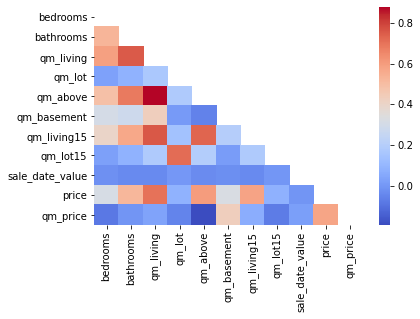

In [95]:
mask = np.triu(hp[continuous_var].corr())

sns.heatmap(hp[continuous_var].corr(), 
            mask=mask, 
            cmap='coolwarm');

**Auf den ersten Blick**
- Gute Korrelation bei `price/qm_living` und `qm_living/qm_living15`

In [96]:
# Correlation of the categorical variables:
hp[categorical_var].corr()

,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,sale_year,sale_month,sale_day,price,qm_price
floors,1.000000,0.021883,0.028436,-0.264075,0.458794,0.489193,0.003535,-0.059541,-0.022352,0.014245,-0.006492,0.256804,-0.157634
waterfront,0.021883,1.000000,0.406654,0.017642,0.087383,-0.026079,0.087244,0.031057,-0.005163,0.008470,0.014281,0.276295,0.212250
view,0.028436,0.406654,1.000000,0.045735,0.249727,-0.054564,0.100964,0.085277,0.001504,-0.005327,0.010786,0.395734,0.301187
condition,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.361592,-0.061858,0.002888,-0.045898,0.022388,-0.004630,0.036056,0.195585
grade,0.458794,0.087383,0.249727,-0.146896,1.000000,0.447865,0.016669,-0.185771,-0.030635,0.008989,-0.012588,0.667951,0.121995
yr_built,0.489193,-0.026079,-0.054564,-0.361592,0.447865,1.000000,-0.225209,-0.347210,0.003574,-0.006235,-0.005982,0.053953,-0.343851
yr_renovated,0.003535,0.087244,0.100964,-0.061858,0.016669,-0.225209,1.000000,0.069846,-0.021990,0.008769,0.008855,0.129599,0.132789
zipcode,-0.059541,0.031057,0.085277,0.002888,-0.185771,-0.347210,0.069846,1.000000,0.001290,-0.000143,-0.002941,-0.053402,0.208965
sale_year,-0.022352,-0.005163,0.001504,-0.045898,-0.030635,0.003574,-0.021990,0.001290,1.000000,-0.782325,-0.006089,0.003727,0.035292
sale_month,0.014245,0.008470,-0.005327,0.022388,0.008989,-0.006235,0.008769,-0.000143,-0.782325,1.000000,-0.060771,-0.009928,-0.030056


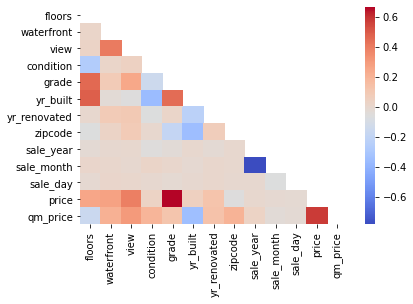

In [97]:
mask = np.triu(hp[categorical_var].corr())

sns.heatmap(hp[categorical_var].corr(), 
            mask=mask, 
            cmap='coolwarm');

**Auf den ersten Blick**
- Gute Korrelation bei `price/grade` und `yr_built/floors`

## Pairplots
- Just to get an idea of possible linear dependency

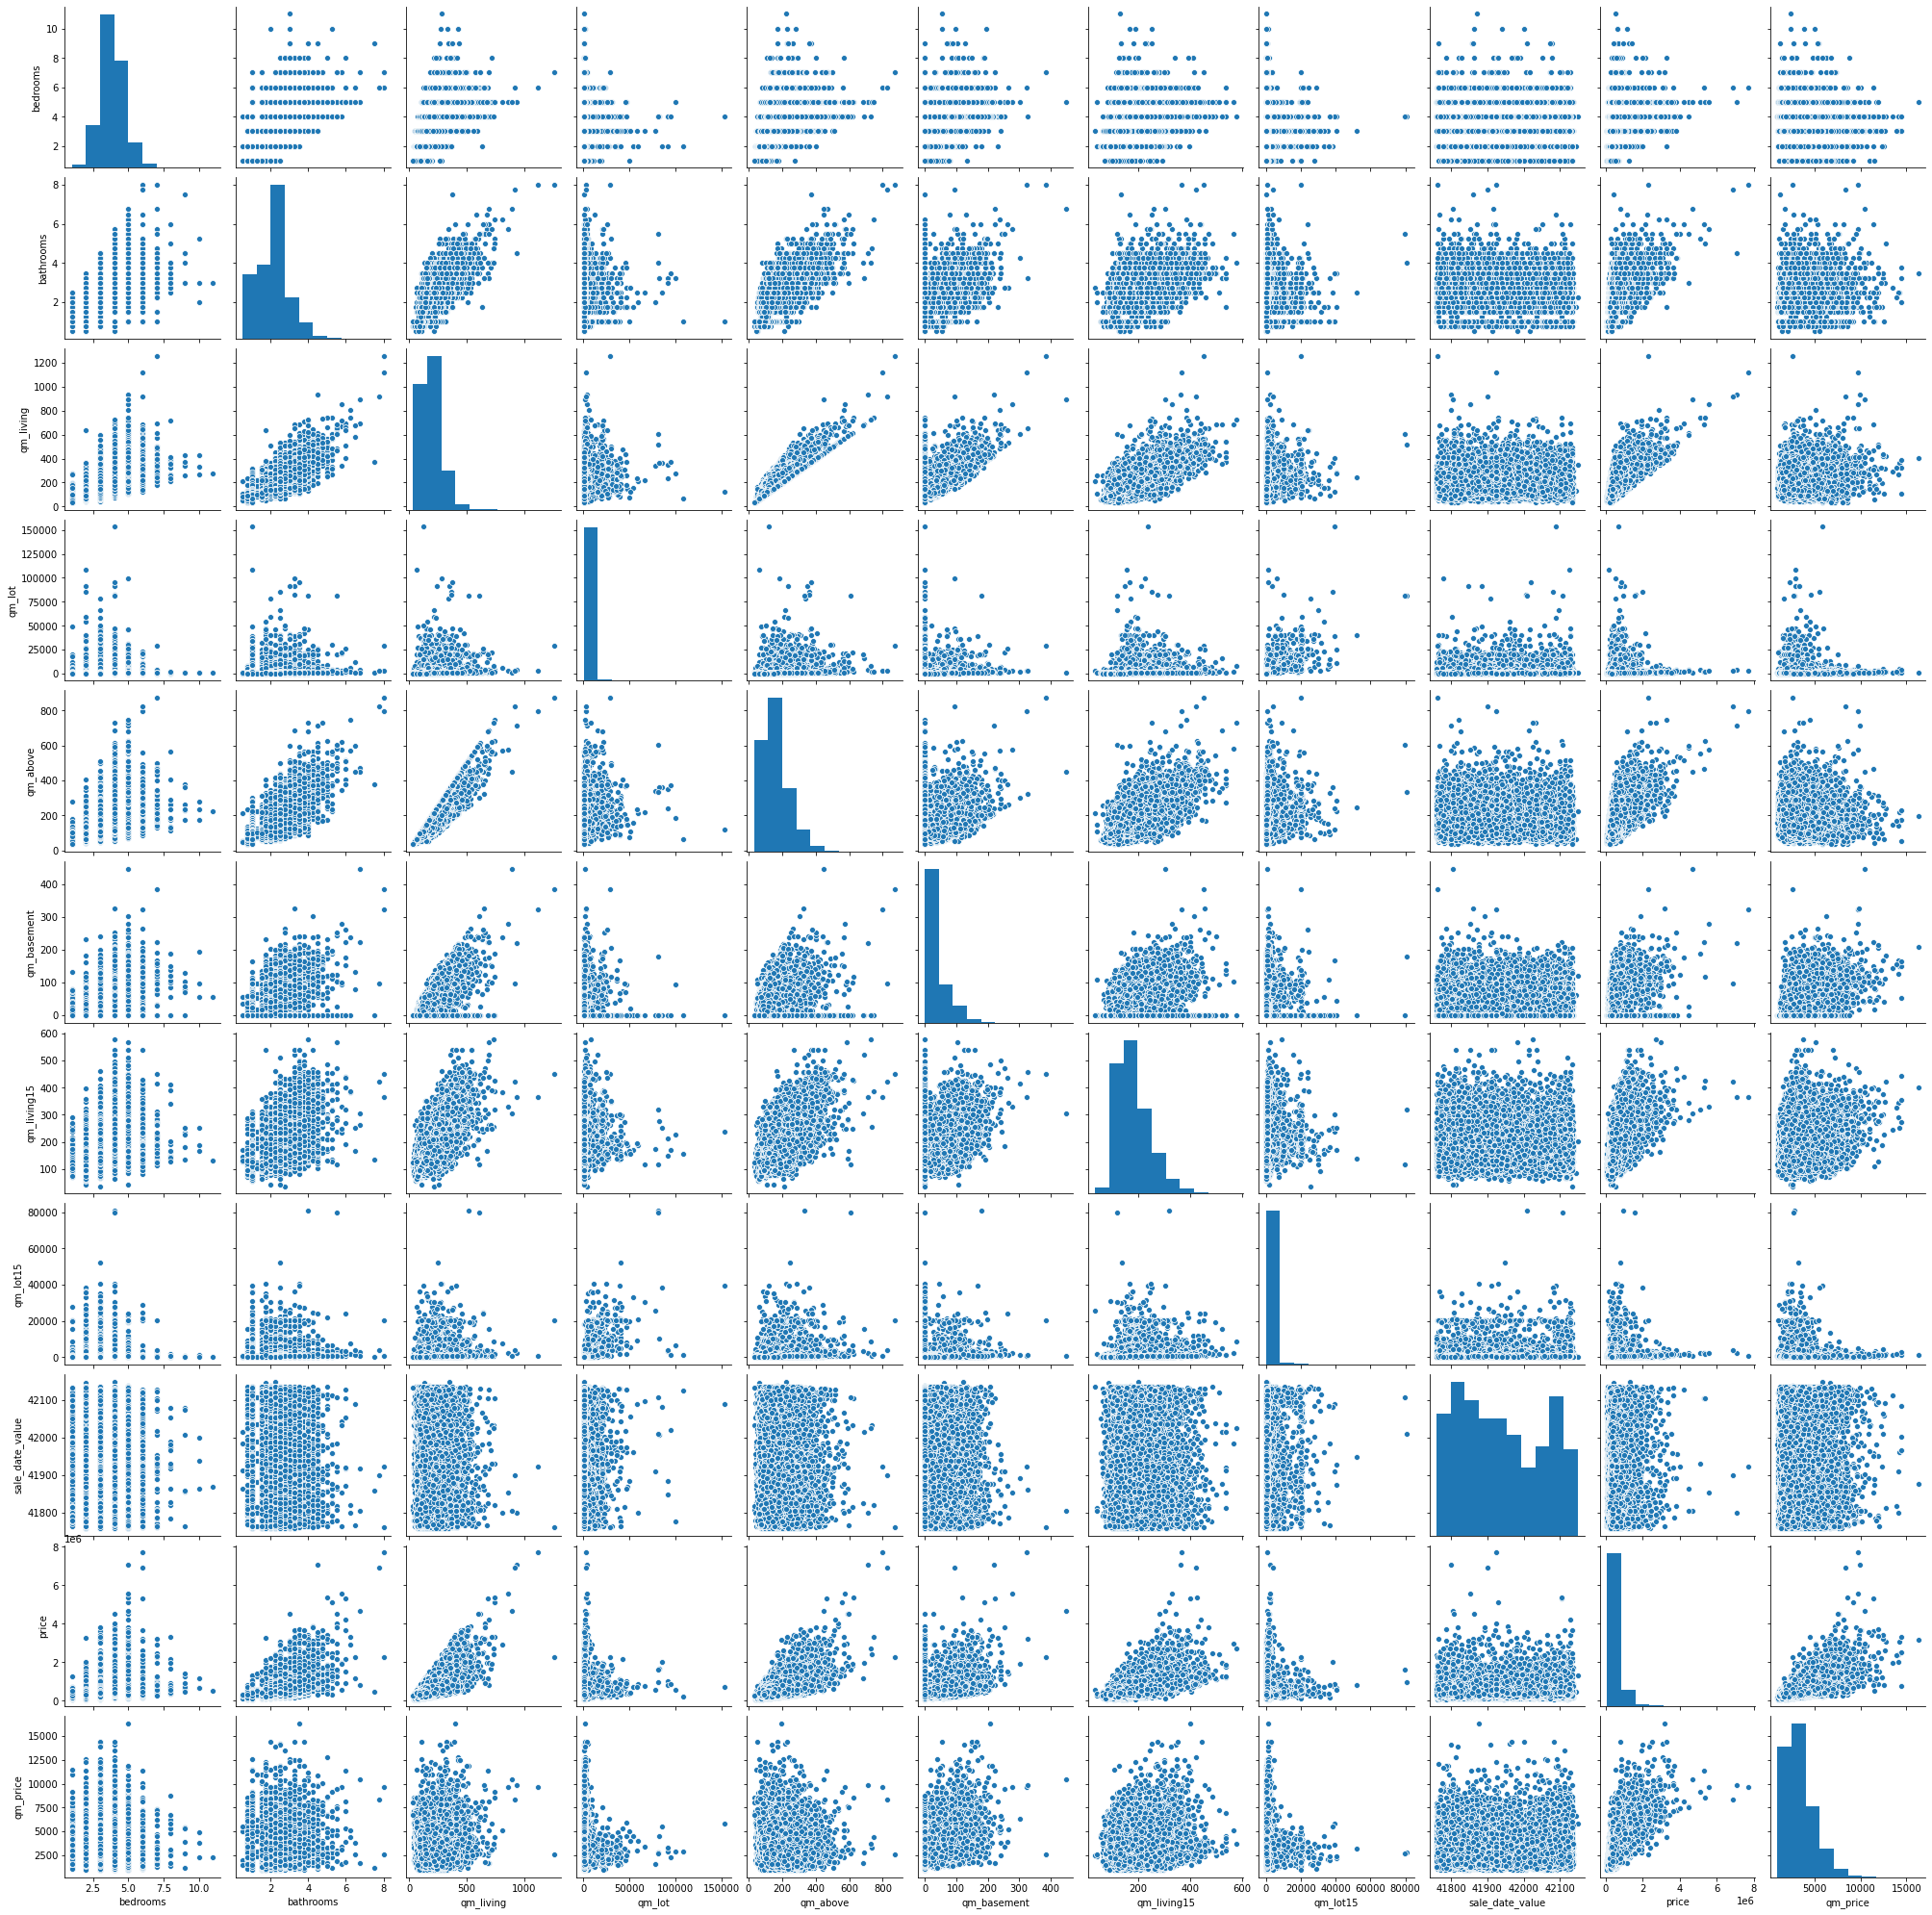

In [98]:
# Paiplot of continuous variables # categorical variables
sns.pairplot(hp_con);
plt.savefig('figures/pairplot_con.png')

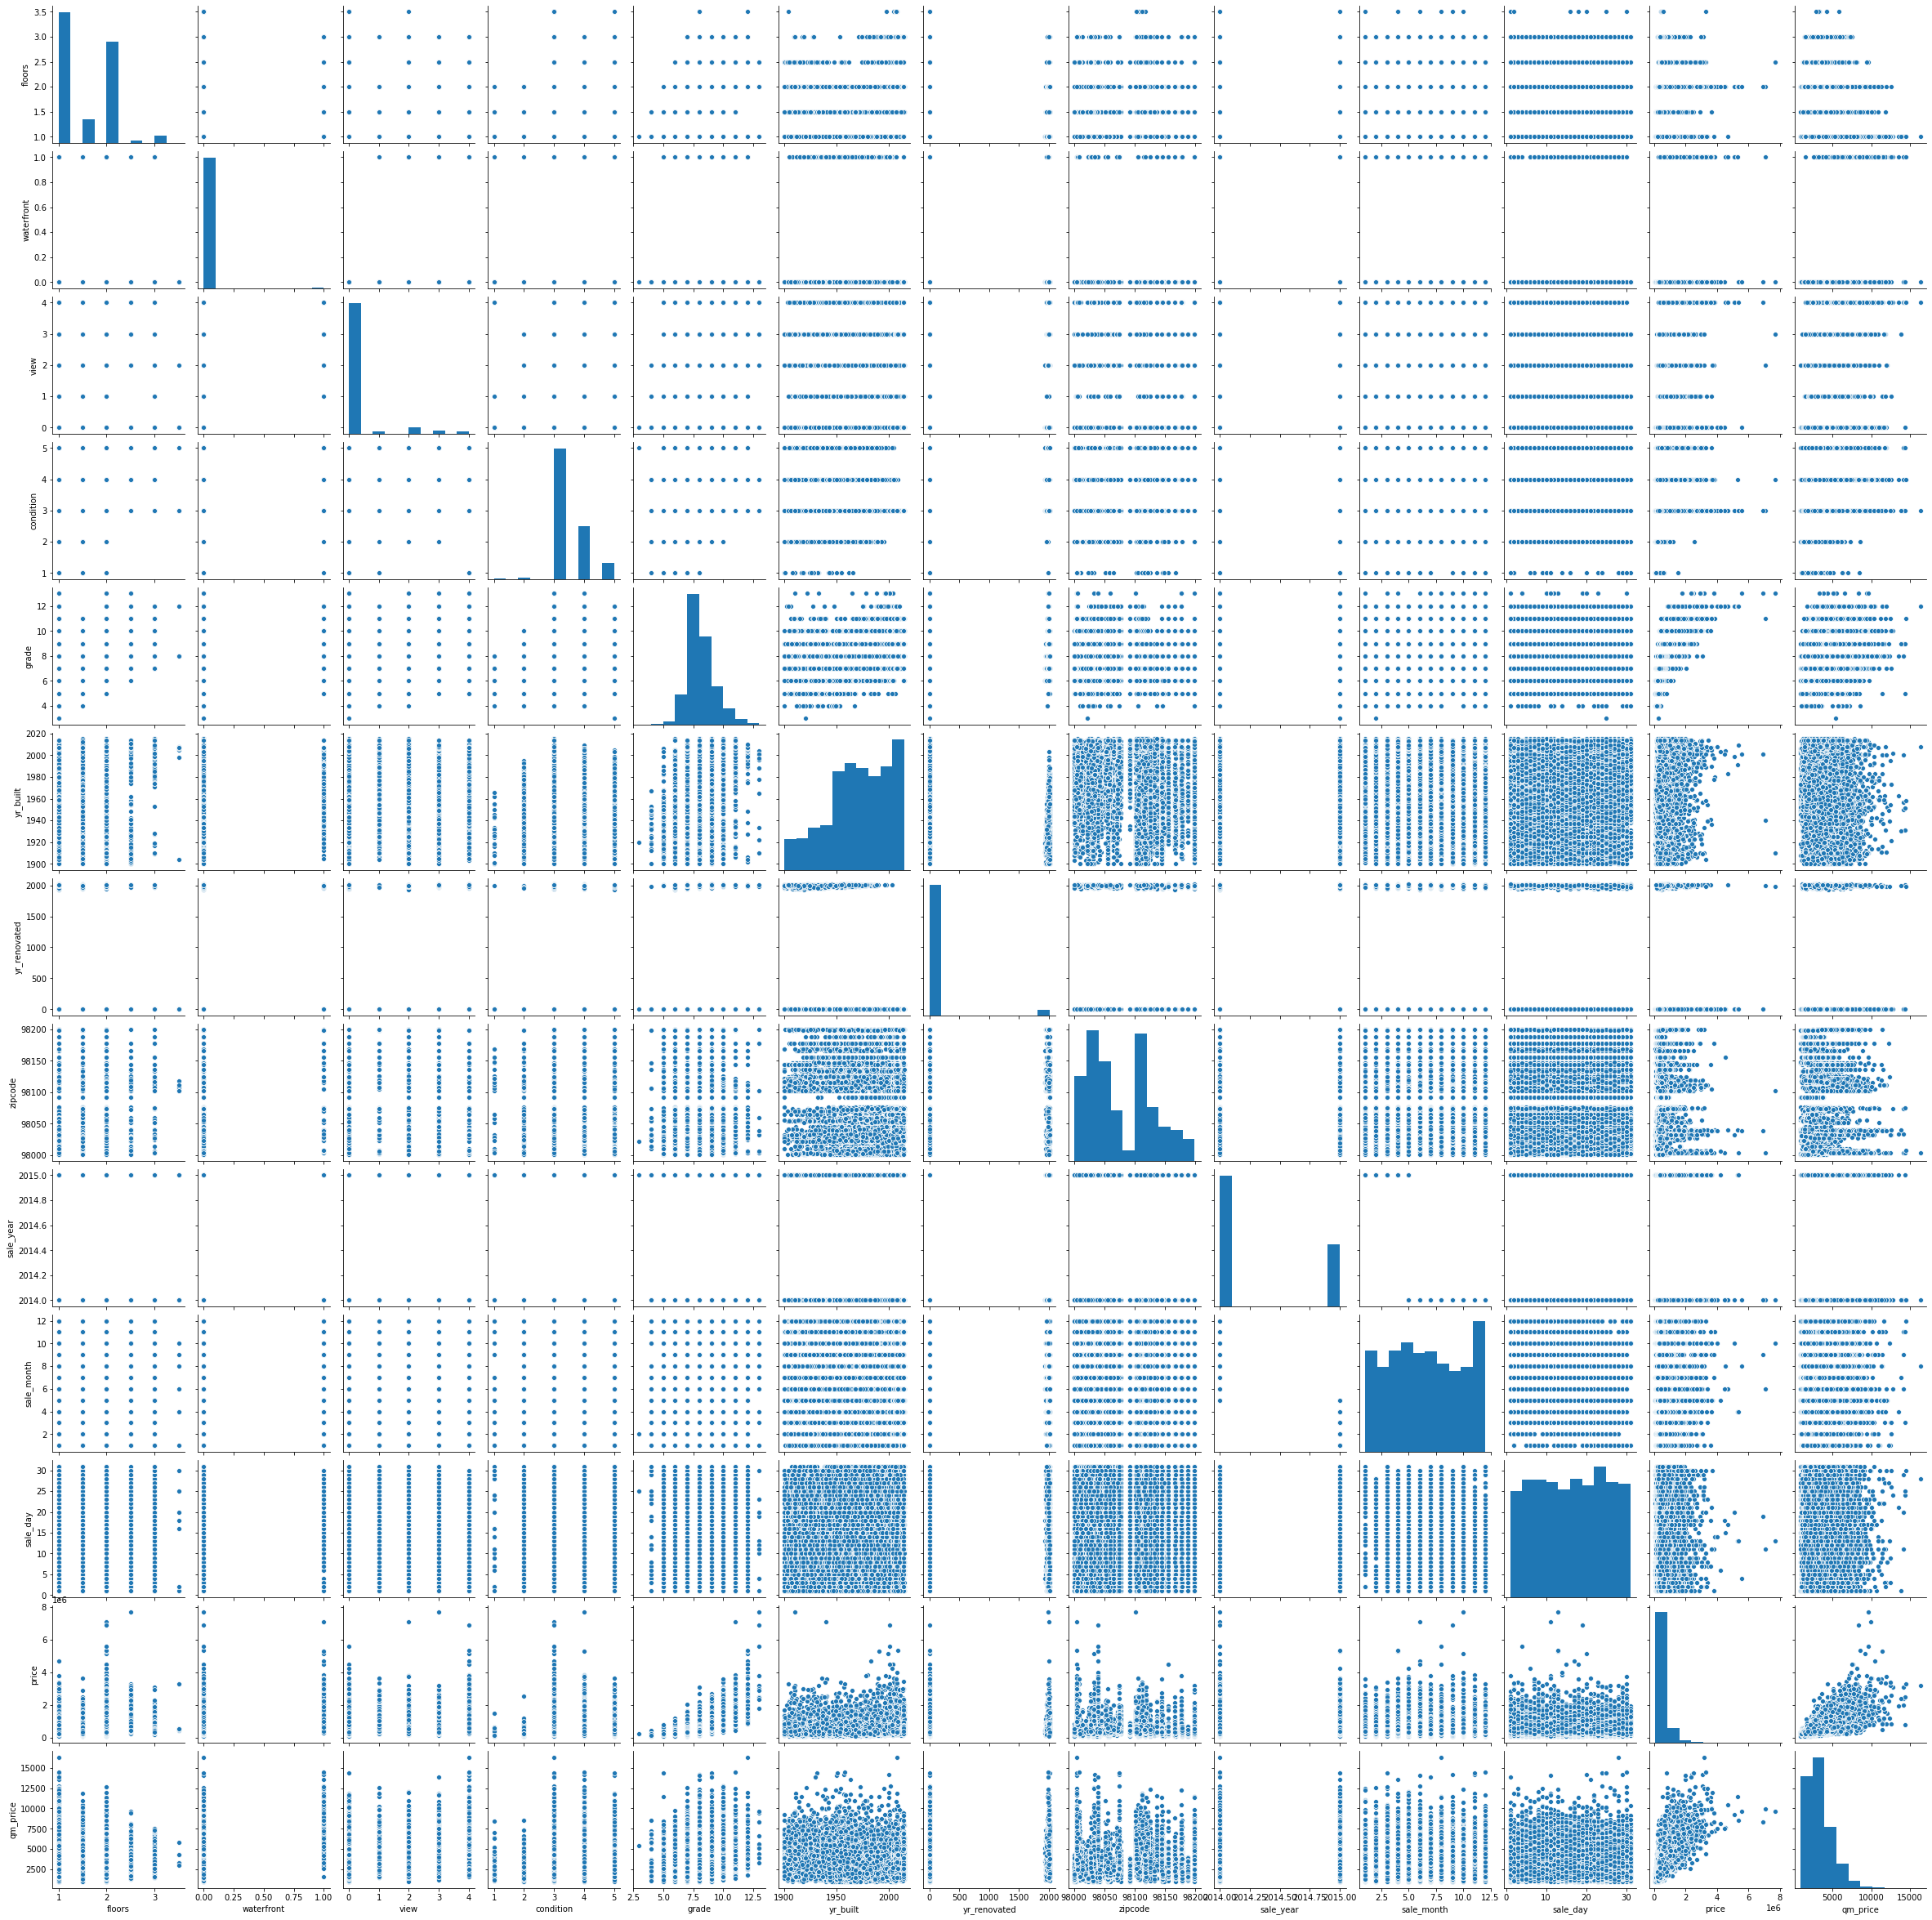

In [66]:
# Paiplot of categorical variables
sns.pairplot(hp_cat);
plt.savefig('figures/pairplot_cat.png')

## Histograms

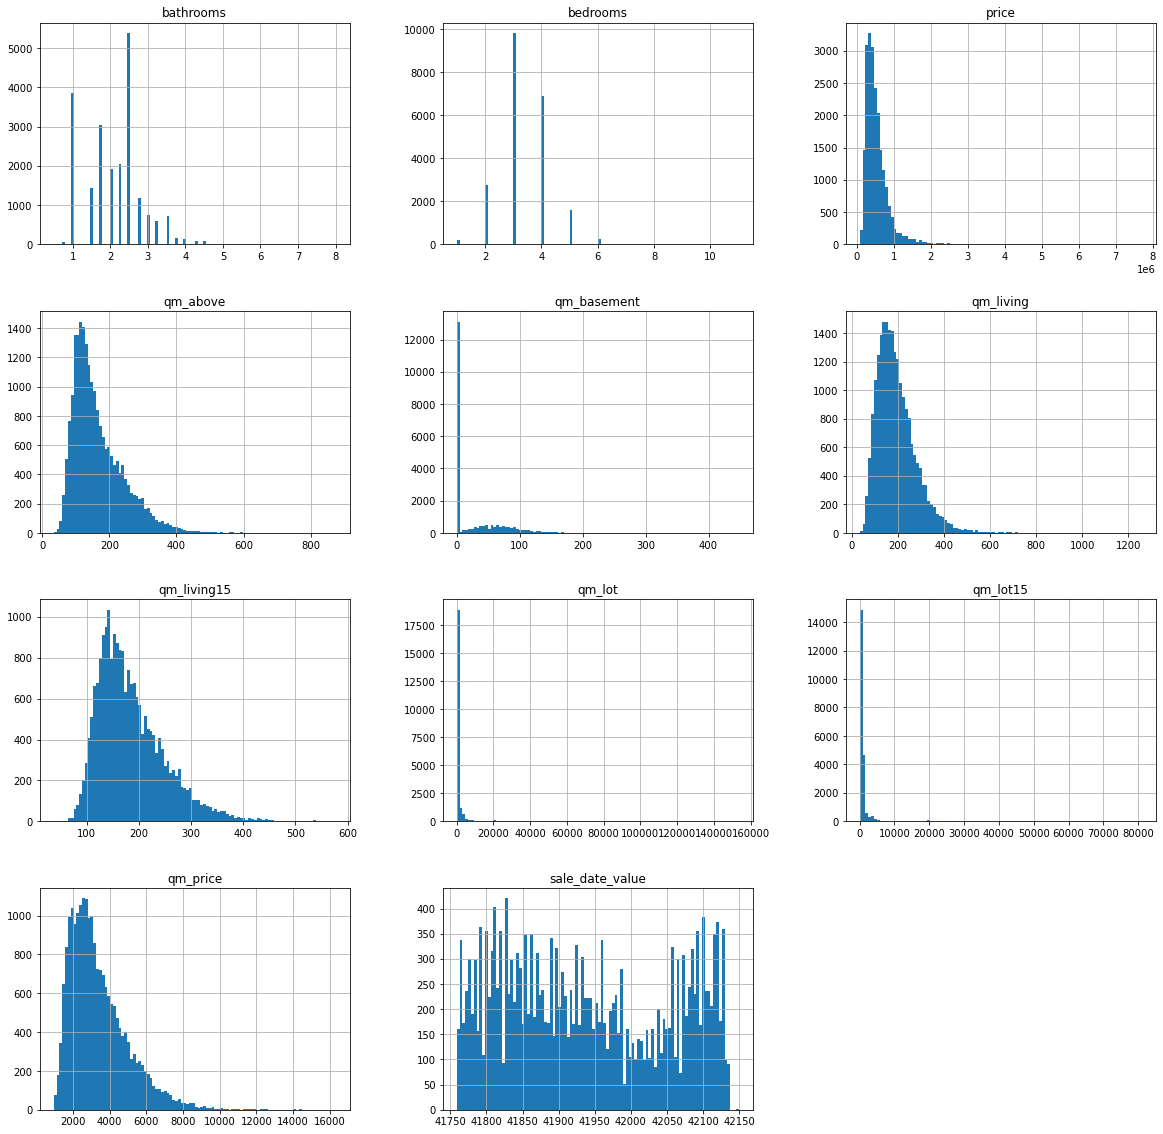

In [68]:
# Our continuous variables
hp_con.hist(figsize=(20,20), bins=100);

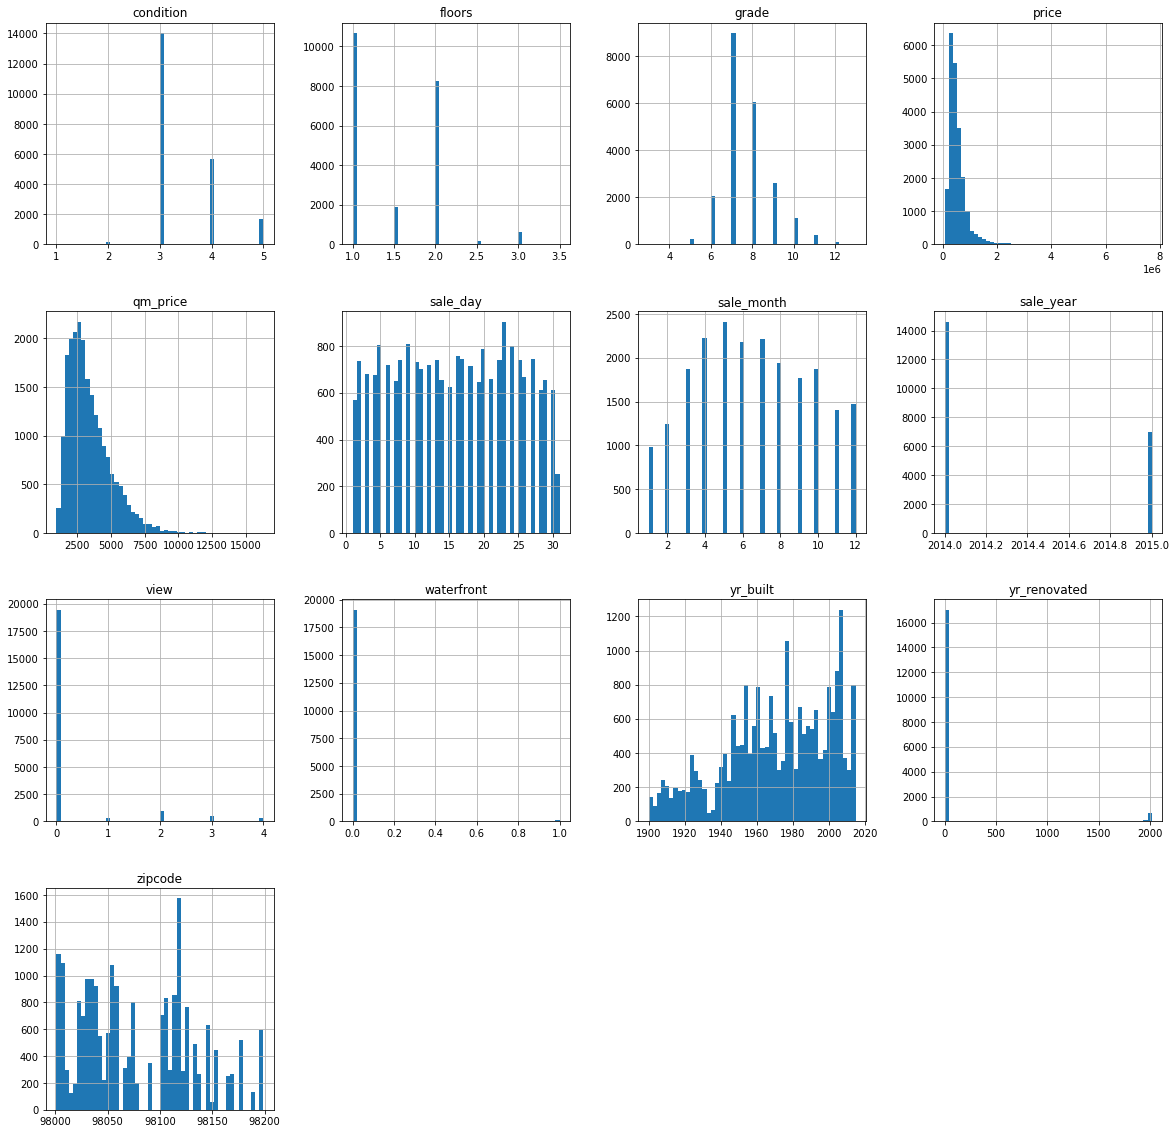

In [70]:
# Our categorical variables
hp_cat.hist(figsize=(20,20), bins=50);

## Investigate questions

**Die Ausgangslage**
- Ich möchte mir für meine Freundin und mich ein Haus in der uns unbekannten Region King County kaufen.
- Es geht uns primäer um ein möglichst gutes Preis-Leistungs-Verhältnis.
- Das heisst, wir suchen einen günstigen Quadratmeterpreis (Wohnfläche, Gründstück)  
  bei möglichst guter Qualität (Zustand, Note).
- Wir arbeiten beide im Home-Office, deshalb ist der genaue Standort (PLZ) nicht so entscheidend.
- Wir haben keine Kinder und brauchen ca. 120qm (Wohnfläche).
- 4 Zimmer (Wohnen, Schlafen, Gäste, Home Office) sollen es sein.
- Das Grundstück sollte nicht zu groß sein (<1000qm). Wir mögen das Rasenmähen nicht.
- Unser Budget beträgt 500.000 USD
- Wir haben es nicht eilig. Zeitpunkt des Kaufes ist nicht entscheidend.
- Einen Keller brauchen wir nicht. Wenn er aber günstig zu haben ist, wäre es schön.


**Sich daraus ergebende Fragen**  
1. Welche Regionen (Top10-PLZ) sollte ich wählen? qm-Preis (Wohnraum) soll günstig sein.
2. Gibt es einen Kauf-Zeitpunkt im Jahr, der sich anbietet?
3. Lohnt es sich vielleicht doch einen Keller zu nehmen? Was kostet das mehr?
4. Wie gut ist die Versorgungslage (Supermärkte) in den Top10-Regionen?

In [128]:
my_query = 'condition >= 3 and grade >=6 and 100 <= qm_above <= 140 and bedrooms >= 4 and qm_lot <= 1000 and price <= 500000'

myhp = hp.query(my_query)

In [73]:
myhp.shape

(843, 35)

In [76]:
myhp.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement_calc,sqft_basement_int,has_basement,qm_living,qm_lot,qm_above,qm_basement,qm_living15,qm_lot15,qm_price
34,7955080270,12/3/2014,322500.0,4,2.75,2060,6659,1.0,0.0,0.0,...,780,780,True,191.38,618.64,118.92,72.46,187.66,810.11,2711.91
97,1099611230,9/12/2014,199000.0,4,1.50,1160,6400,1.0,0.0,0.0,...,0,0,False,107.77,594.58,107.77,0.00,107.77,594.58,1846.53
127,8732020310,7/17/2014,260000.0,4,2.25,2160,8811,1.0,0.0,0.0,...,800,800,True,200.67,818.57,126.35,74.32,194.17,780.39,2057.78
137,4027700812,5/29/2014,452000.0,4,2.25,2590,10002,1.0,0.0,0.0,...,1250,1250,True,240.62,929.22,124.49,116.13,144.00,969.54,3630.81
144,6071600370,2/27/2015,500000.0,4,2.25,2030,8517,1.0,0.0,0.0,...,650,650,True,188.59,791.25,128.21,60.39,207.17,819.78,3899.85


### Welche Region (zipcode) sollte ich wählen? Qm2-Preis (Wohnraum) soll günstig sein
- x=PLZ, y=qm_price.mean()

In [77]:
myhp451 = myhp.groupby('zipcode').mean().qm_price

In [78]:
myhp451.shape

(58,)

In [79]:
myhp451.min().round(0), myhp451.max().round(0)

(1904.0, 4746.0)

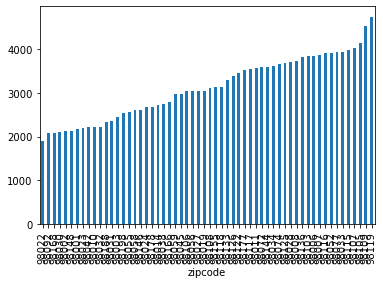

In [80]:
myhp451.sort_values().plot(kind = 'bar');

In [81]:
savings = round((1-(myhp451.min()/myhp451.max()))*100,2)
print(f'As you can see, there are really big differences! Savings can be up to {savings}%!')

As you can see, there are really big differences! Savings can be up to 59.88%!


In [82]:
# Top-10 zipcodes:
myhp451.sort_values().head(10)

zipcode
98022    1904.075000
98092    2085.052222
98168    2086.847333
98030    2112.916364
98002    2123.047500
98148    2139.043333
98001    2178.154762
98023    2189.380217
98042    2212.067143
98010    2230.270000
Name: qm_price, dtype: float64

In [83]:
# Top-10 zipcodes:
top10zip = [i for i in myhp451.sort_values().head(10).index]
top10zip

[98022, 98092, 98168, 98030, 98002, 98148, 98001, 98023, 98042, 98010]

**Recommendation 1:** Look mainly and first for offers from the Top10 zip-codes!

### Gibt es einen Kauf-Zeitpunkt im Jahr, der sich anbietet?
x=sale_month, y=qm_price_above.mean

In [84]:
myhp452 = myhp.groupby('sale_month').mean().qm_price.round(0)
myhp452

sale_month
1     2823.0
2     2794.0
3     3047.0
4     3030.0
5     3027.0
6     3020.0
7     2915.0
8     2802.0
9     2834.0
10    2959.0
11    3138.0
12    3148.0
Name: qm_price, dtype: float64

In [99]:
myhp452.min().round(0), myhp452.max().round(0)

(2794.0, 3148.0)

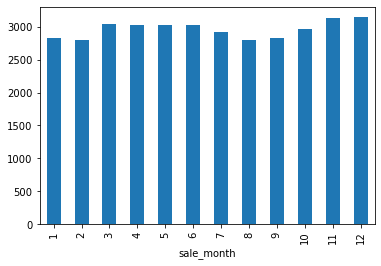

In [100]:
#myhp.groupby('sale_month').mean().qm_price.plot.bar();
myhp452.plot.bar();

In [101]:
savings = round((1-(myhp452.min()/myhp452.max()))*100,2)
print(f'As you can see, there are differences! Savings can be up to {savings}%!')

As you can see, there are differences! Savings can be up to 11.25%!


**Recommendation 2:** Buy in February! It's about 12% cheaper than in the most expensiv month (December)

### Lohnt es sich vielleicht doch einen Keller zu nehmen? Wie viel teurer wird das (in den Top10 Zipcodes)?
x=basement/no_basement, y=qm_price_above.mean

In [102]:
myhp.shape

(843, 35)

In [103]:
top10zip

[98022, 98092, 98168, 98030, 98002, 98148, 98001, 98023, 98042, 98010]

In [104]:
myhpzip = myhp.query('zipcode in @top10zip')

In [105]:
myhpzip.shape

(143, 35)

In [106]:
myhpzip[relevant_cols].head()

,price,qm_price,yr_built,yr_renovated,zipcode,grade,condition,bedrooms,bathrooms,qm_above,qm_basement,has_basement,qm_lot,floors,waterfront,sale_year,sale_month
97,199000.0,1846.53,1975,0.0,98023,7,4,4,1.50,107.77,0.00,False,594.58,1.0,0.0,2014,9
127,260000.0,2057.78,1978,NaN,98023,8,3,4,2.25,126.35,74.32,True,818.57,1.0,0.0,2014,7
186,269000.0,2632.35,1969,0.0,98023,8,4,4,1.75,102.19,36.23,True,929.03,1.0,0.0,2015,4
227,264950.0,2546.37,1978,0.0,98023,7,4,4,2.25,104.05,55.74,True,906.08,1.0,NaN,2014,5
485,295000.0,2174.87,1978,NaN,98023,8,4,4,2.50,135.64,65.03,True,717.68,1.0,0.0,2015,4


In [110]:
myhp453 = myhpzip.groupby('has_basement').median().qm_price
myhp453

has_basement
False    1769.525
True     2305.620
Name: qm_price, dtype: float64

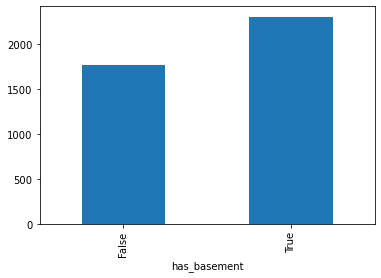

In [113]:
myhp453.plot(kind = 'bar');

In [114]:
myhp453.min(), myhp453.max()

(1769.525, 2305.62)

In [117]:
surcharge = round((myhp453.max()/myhp453.min()-1)*100,2)
print(f'As you can see, there are hugh differences! Surcharges are about {surcharge}%!')

As you can see, there are hugh differences! Surcharges are about 30.3%!


**Recommendation 3:** Search for houses without cellars. They increase the price per square metre considerably and you do not need it.

# Step (Feature Engineering):
- See 3.2 Improve the data (with Feature Engineering)

# Step (Predictive Modelling):

## Creating Multivariate Linear Regression
**Nun wollen wir ein LR-Modell bauen, dass den Verkaufspreis möglichst genau vorhersagt**
- Verwendete Variablen: Auf jeden Fall `grade` und `qm_living` weil diese bei der Correlation analysis positiv aufgefallen sind

In [229]:
hplr = hp.query('price < 2000000')
hplr.shape

(21389, 35)

In [234]:
test0 = ['grade', 'qm_living']
test1 = ['qm_living','qm_living15','qm_lot','qm_lot15','qm_above','bedrooms','bathrooms','floors','grade','condition','view','lat','long']

y = hplr.price

X = hplr[test1]
X = sm.add_constant(X)

# Create an OLS model
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     3592.
Date:                Wed, 16 Sep 2020   Prob (F-statistic):               0.00
Time:                        21:27:18   Log-Likelihood:            -2.8729e+05
No. Observations:               21389   AIC:                         5.746e+05
Df Residuals:                   21376   BIC:                         5.747e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.549e+07   1.16e+06    -47.770      0.000   -5.78e+07   -5.32e+07
qm_living    1314.7241     39.752     33.073      0.000    1236.806    1392.642
qm_living15   496.0037     31.056     15.971      0.000     435.132     556.875
qm_lot          2.7829      0.426      6.534      0.000       1.948       3.618
qm_lot15       -2.5007      0.648     -3.861      0.000      -3.770      -1.231
qm_above       73.2622     39.219      1.868      0.062      -3.610     150.134
bedrooms    -1.214e+04   1637.742     -7.410      0.000   -1.53e+04   -8926.326
bathrooms   -1879.3415   2561.050     -0.734      0.463   -6899.191    3140.508
floors      -1.135e+04   2882.795     -3.939      0.000    -1.7e+04   -5704.072
grade        7.502e+04   1741.594     43.076      0.000    7.16e+04    7.84e+04
view          6.27e+04   1669.040     37.569      0.000    5.94e+04     6.6e+04
lat          6.184e+05   8384.912     73.755      0.000    6.02e+05    6.35e+05
long        -2.105e+05   9274.866    -22.691      0.000   -2.29e+05   -1.92e+05
==============================================================================
Omnibus:                     6581.840   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31934.535
Skew:                           1.417   Prob(JB):                         0.00
Kurtosis:                       8.273   Cond. No.                     4.79e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.79e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [237]:
X.head()

,const,qm_living,qm_living15,qm_lot,qm_lot15,qm_above,bedrooms,bathrooms,floors,grade,view,lat,long
0,1.0,109.63,124.49,524.90,524.90,109.63,3,1.00,1.0,7,0.0,47.5112,-122.257
1,1.0,238.76,157.01,672.80,709.69,201.60,3,2.25,2.0,7,0.0,47.7210,-122.319
2,1.0,71.54,252.70,929.03,748.98,71.54,2,1.00,1.0,6,0.0,47.7379,-122.233
3,1.0,182.09,126.35,464.51,464.51,97.55,4,3.00,1.0,7,0.0,47.5208,-122.393
4,1.0,156.08,167.23,750.66,697.05,156.08,3,2.00,1.0,8,0.0,47.6168,-122.045


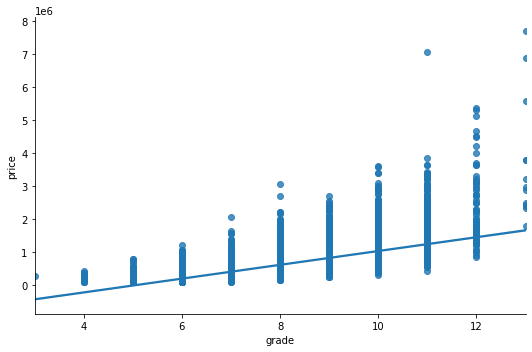

In [136]:
# Dependence between grade and price
sns.lmplot('grade', 'price', data=hp, aspect=1.5, ci=95);

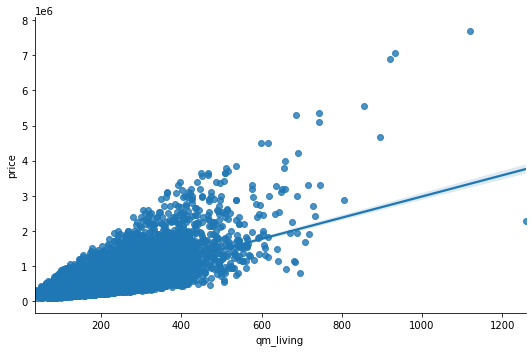

In [135]:
# Dependence between qm_living and price
sns.lmplot('qm_living', 'price', data=hp, aspect=1.5, ci=95);

In [138]:
results.params

grade        2916.629689
qm_living    2730.966585
dtype: float64

## Split the data and use RMSE

In [147]:
train, test = train_test_split(hp, test_size=0.2)

In [152]:
print(train.shape)
train.head()

(17277, 35)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement_calc,sqft_basement_int,has_basement,qm_living,qm_lot,qm_above,qm_basement,qm_living15,qm_lot15,qm_price
16564,5112800190,3/27/2015,249000.0,3,1.50,1180,11579,1.0,NaN,0.0,...,0,0,False,109.63,1075.72,109.63,0.00,165.37,2089.02,2271.28
15305,4384000020,7/3/2014,605000.0,4,2.50,2800,10786,1.0,0.0,0.0,...,1380,1380,True,260.13,1002.05,131.92,128.21,198.81,1002.24,4586.11
15753,3211260290,3/9/2015,443000.0,4,3.00,2620,35124,2.0,0.0,0.0,...,0,0,False,243.41,3263.12,243.41,0.00,271.28,3326.58,1819.97
3841,4022900077,4/13/2015,615000.0,4,2.75,2750,15450,1.0,0.0,0.0,...,950,950,True,255.48,1435.35,167.23,88.26,255.48,986.63,3677.57
8418,558100090,3/12/2015,628000.0,5,2.75,2600,8160,2.0,0.0,0.0,...,0,0,False,241.55,758.09,241.55,0.00,148.64,758.09,2599.88


In [155]:
print(test.shape)
test.price.head()

(4320, 35)


9802     650000.0
2438     520000.0
4812     475000.0
11388    300000.0
15163    335000.0
Name: price, dtype: float64

# Step (Data Visualization):